# Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# import TTS
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# import decision tree regressor (simple regression/decision tree)
from sklearn.tree import DecisionTreeRegressor

# import bagged trees & random forest
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

Here is the Data Dictionary for this dataset:

# Data Cleaning

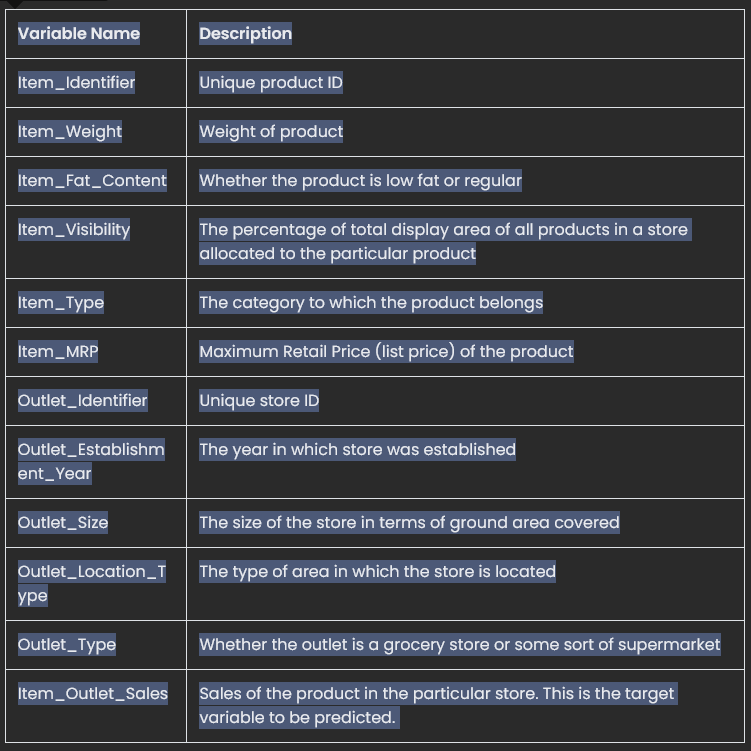

In [4]:
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Q1:  How many rows and columns?
rows = len(df.axes[0])
columns = len(df.axes[1])
print(rows)
print(columns)
# Rows = 8,523, Columns = 12

8523
12


In [6]:
# Q1:  How many rows and columns?
df.shape
# Rows = 8,523, Columns = 12

(8523, 12)

In [7]:
# Q2:  What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Q2:  What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Q3: Are there duplicates? (If so, drop any duplicates.)
df.duplicated().any()
# False = No duplicates

False

In [10]:
# Q4: Identify missing values
df.isnull().sum()
# Missing = Item Weight (1,463), Outlet Size (2410)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Q5: Decide on how to address the missing values and do it! 
#df1['Item_Weight'] = df.fillna(df['Item_Weight'].mean())
df1 = df.fillna(df['Item_Weight'].mean())
# df1.isnull().sum()
# Justification:  for Item Weight - Kept Item weight column and used mean.
# Would like to have found mean item weight by type (e.g., soda, meat, dairy)

In [12]:
# Q5: Decide on how to address the missing values and do it! 
df1 = df1.drop(columns = ['Outlet_Size'])
# Justification for Outlet Size:  Dropped column b/c did not seem critical
# Would like to have been able to better analyze data to better evaluate
# Both are beyond my skills at this point, but looking forward to learning more!

In [13]:
# Q6: Confirm that there are no missing values after addressing them.
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF','Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')
df1['Item_Fat_Content'].value_counts()
# Looks good!

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Item_Identifier'].value_counts()
#Looks good!

FDG33    10
FDW13    10
NCJ30     9
NCB18     9
NCF42     9
         ..
FDE52     1
FDQ60     1
FDC23     1
FDK57     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Item_Type'].value_counts()
# Looks good!

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Outlet_Identifier'].value_counts()
# Looks Good!

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Outlet_Location_Type'].value_counts()
# Looks Good!

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Outlet_Type'].value_counts()
# OK, assiming that looks good, but could supermarket types be combined?

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [21]:
# Q8: For any numerical columns, obtain the (min, max, mean) for each
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [22]:
# Item Weight summary statistics
df1['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [23]:
# Item_Visibility summary statistics
df1['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [24]:
# Item_MRP summary statistics
df1['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [25]:
# Outlet_Establishment_Year summary statistics
df1['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [61]:
df1['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# Exploratory Visualizations

1:  Heat Map:  I ended up starting with a head map to see where the data correlated, as a way to look for meaningful correlations to dig deeper into with further visualizations.  Result was a moderate correlation (r2 = 0.57) between 'Item MRP' and 'Item Outlet Sales.'  All other correlations were low, so decided to focus on the relationship between "Item MRP' and 'Item Outlet Sales.'

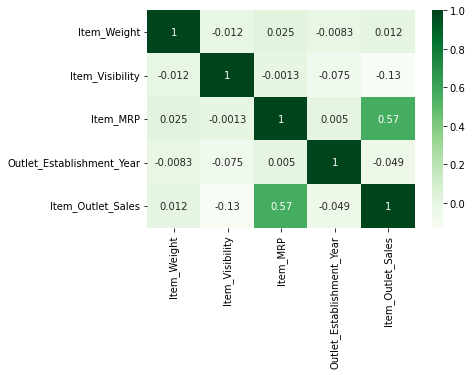

In [26]:
corr = df1.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True);

Heat Map:  I ended up starting with a head map to see how the data correlated, as a way to look areas to dig deeper into.  Result was a moderate correlation (r2 = 0.57) between 'Item MRP' and 'Item Outlet Sales.'  All other correlations were low, so decided to focus on the relationship between "Item MRP' and 'Item Outlet Sales,' but then realized that these were only the integer categories (so a bit less exciting than I first thought).

Box Plots

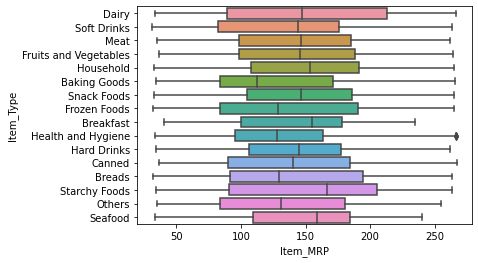

In [27]:
sns.boxplot(x = df1['Item_MRP'], y = df1['Item_Type'])


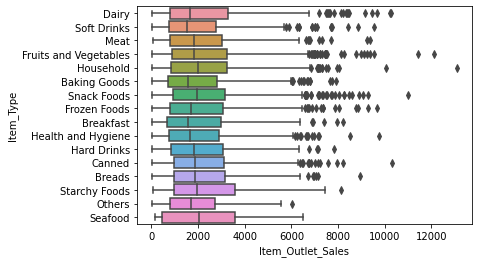

In [72]:
sns.boxplot(x = df1['Item_Outlet_Sales'], y = df1['Item_Type']);

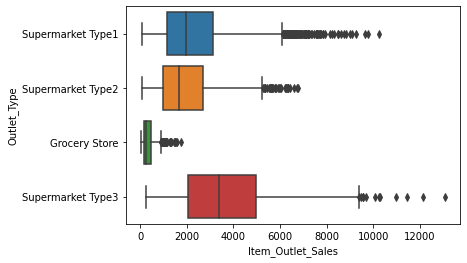

In [29]:
sns.boxplot(x = df1['Item_Outlet_Sales'], y = df1['Outlet_Type']);

Supermarket Type 3 has the largest median sales and largest distrubition



In [30]:
type3_filter = df1['Outlet_Type'] == 'Supermarket Type3' 
type3 = df1.loc[type3_filter, :]
len(df1[type3_filter])

935

Bar Graphs

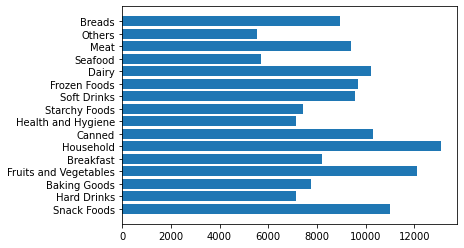

In [31]:
from matplotlib import pyplot as plt
plt.barh(type3['Item_Type'], type3['Item_Outlet_Sales']);

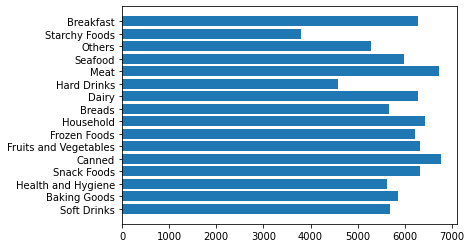

In [32]:
type2_filter = df1['Outlet_Type'] == 'Supermarket Type2' 
type2 = df1.loc[type2_filter, :]
len(df1[type2_filter])

from matplotlib import pyplot as plt
plt.barh(type2['Item_Type'], type2['Item_Outlet_Sales']);

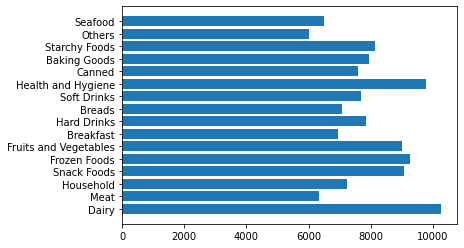

In [33]:
type1_filter = df1['Outlet_Type'] == 'Supermarket Type1' 
type1 = df1.loc[type1_filter, :]
len(df1[type1_filter])

from matplotlib import pyplot as plt
plt.barh(type1['Item_Type'], type1['Item_Outlet_Sales']);

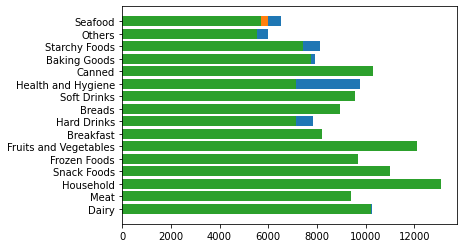

In [34]:
plt.barh(type1['Item_Type'], type1['Item_Outlet_Sales']);
plt.barh(type2['Item_Type'], type2['Item_Outlet_Sales']);
plt.barh(type3['Item_Type'], type3['Item_Outlet_Sales']);

Histogram

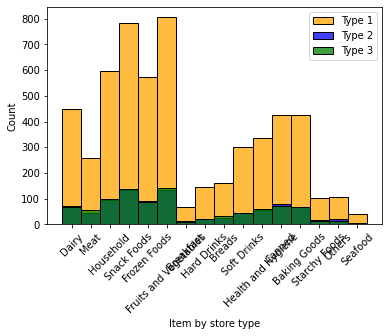

In [35]:
sns.histplot(type1['Item_Type'], color='orange', label = 'Type 1')
sns.histplot(type2['Item_Type'], color='blue', label = 'Type 2') 
sns.histplot(type3['Item_Type'], color='green', label = 'Type 3') 
plt.xlabel('Item by store type')
plt.xticks(rotation = 45)
plt.legend();

Another look at how much more Type 1 stores sell vs Type 2 and Type 1

# Explanatory Visualizations

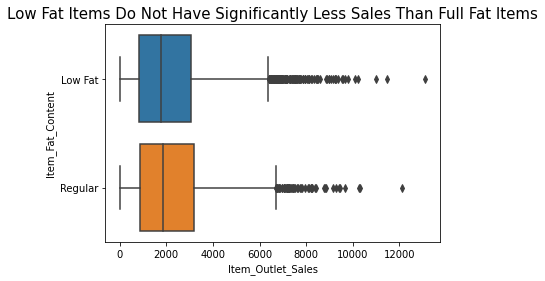

In [38]:
sns.boxplot(x = df1['Item_Outlet_Sales'], y = df1['Item_Fat_Content']);
plt.title('Low Fat Items Do Not Have Significantly Less Sales Than Full Fat Items', fontsize = 15);

Fat tastes good..., so I was wondering if higher fat items outperformed, in total sales, vs. lower fat items.   The answer, surprisingly, is no!

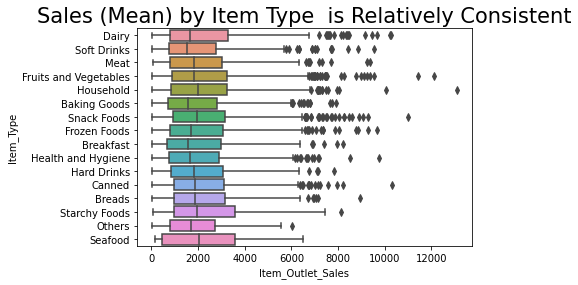

In [39]:
sns.boxplot(x='Item_Outlet_Sales', y='Item_Type', data = df)
plt.title('Sales (Mean) by Item Type  is Relatively Consistent', fontsize = 21);

# Week 5 - Machine Learning & Linear Regression

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

r2

0.6716976476073483

-2.9682683729842308e+16

RMSE

286171015743.70355

In [40]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [41]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [42]:
ohe_df = pd.get_dummies(df1, columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)
ohe_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,...,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [43]:
ohe_df.corrwith(ohe_df['Item_Outlet_Sales']).sort_values(ascending = False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.567574
Outlet_Type_Supermarket Type3    0.311192
Outlet_Identifier_OUT027         0.311192
Outlet_Type_Supermarket Type1    0.108765
                                   ...   
Outlet_Type_Supermarket Type2   -0.038059
Outlet_Identifier_OUT018        -0.038059
Outlet_Establishment_Year       -0.049135
Item_Visibility                 -0.128625
Outlet_Identifier_OUT019        -0.277250
Length: 1593, dtype: float64

In [44]:
# Separate your data into the features matrix (X) and target vector (y).
# Assign the "Item_Outlet_Sales" column as your target vector (y)
# Assign the rest of the variables as your features matrix 
y = ohe_df['Item_Outlet_Sales']
X = ohe_df.drop(columns = 'Item_Outlet_Sales')

In [45]:
# Create a train, test, split on the data. Please use random number 42 for consistency.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [46]:
# Build a linear regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)
test_preds = reg.predict(X_test)

# Use the model to make predictions on the test set.
train_score = reg.score(X_train, y_train)
print(train_score)

test_score = reg.score(X_test, y_test)
print(test_score)

# Save predictions
preds_train = reg.predict(X_train)
print(preds_train.mean())
preds_test = reg.predict(X_test)
print(preds_test.mean())

0.6716976476073483
-2.9682683729842308e+16
2209.976637667201
13104569610.027027


In [47]:
# Note - here were the r2 and pred values when running just Item_Outlet_Sales and Item_MRP
0.3211792348170217
0.3225499246428478
2209.9793571964956
2148.4851335119133

2148.4851335119133

In [48]:
# Evaluate your test set results using r2
reg.score(X, y)

-7032031706104289.0

In [49]:
# Calculating test MSE (to be able to calculate RMSE)
mean_squared_error(y_test, test_preds)

8.189385025178304e+22

In [50]:
# Evaluate your test set results using RMSE
np.sqrt(mean_squared_error(y_test, test_preds))

286171015743.70355

# Regression Tree Models

Regression Tree (Simple Decision Tree Model)

Improved correlation over linear regression

r2

0.6122318361448813

0.588890582401477

RMSE

1069.6948273117068

In [51]:
dec_tree = DecisionTreeRegressor(random_state = 42)

dec_tree.fit(X_train, y_train)

dec_train_preds = dec_tree.predict(X_train)
dec_test_preds = dec_tree.predict(X_test)

dec_train_score = dec_tree.score(X_train, y_train)
dec_test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.6716976476073483
-2.9682683729842308e+16


In [52]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 8)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

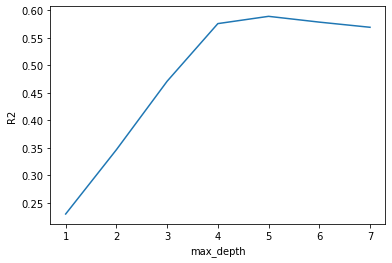

In [53]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [56]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
dec_train_5_score = dec_tree_5.score(X_train, y_train)
dec_test_5_score = dec_tree_5.score(X_test, y_test)
print(dec_train_5_score)
print(dec_test_5_score)

# Save predictions
dec_preds_5 = dec_tree_5.predict(X)
print(dec_preds_5)

# RMSE
np.sqrt(mean_squared_error(y, dec_preds_5))

0.6122318361448813
0.588890582401477
[4145.55060456  636.88442281 2073.67326471 ... 1526.57033252 1491.82348412
  957.48437367]


1069.6948273117068

# Bagged Trees

Improvement over regression tree

r2

0.9184773073967285

0.5265376546818851

RMSE:

712.4228392338497

In [73]:
bagreg = BaggingRegressor(random_state = 42)

bagreg.fit(X_train, y_train)

bagreg.predict(X_test)

bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

# Save predictions
bagreg_preds = bagreg.predict(X)
print(bagreg_preds)

# RMSE
np.sqrt(mean_squared_error(y, bagreg_preds))

0.9184773073967285
0.5265376546818851
[6035.34384  574.45224 1998.3987  ... 1468.95454 1093.70966  871.39904]


712.4228392338497

# Random Forest 

Best fit of the four models for predicting sales

r2

0.9370377920925759

0.551683795847306

RMSE:

670.0781825468398

In [59]:
rf = RandomForestRegressor(random_state = 42)

rf.fit(X_train, y_train)

rf.predict(X_test)

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

# Save predictions
rf_preds = rf.predict(X)
print(rf_preds)

# RMSE
np.sqrt(mean_squared_error(y, rf_preds))

0.9370377920925759
0.551683795847306
[5545.568044  502.472602 1825.563678 ... 1345.362086 1263.035916
  931.740494]


670.0781825468398

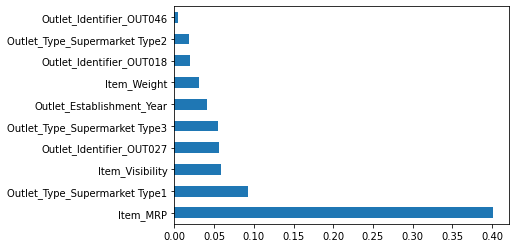

In [67]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');